In [99]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [100]:
limInf=-1
limSup=3
def f(T):
    ans =  (T**3-5*T+np.cos(T)*np.sin(10*T))*50
    return ans


In [101]:
def initPupulation(populationSize:int,nbits:int,verbose=False):
    individuos = []
    for i in range(populationSize):
        adnList = [random.getrandbits(1) for number in range(nbits)]
        individuos.append(adnList)
        if verbose:
            print("Individuo =",str(i),":",str(adnList))
    
    return individuos

población = initPupulation(5,8,True)

Individuo = 0 : [1, 1, 0, 0, 0, 1, 1, 0]
Individuo = 1 : [0, 0, 0, 0, 0, 0, 1, 1]
Individuo = 2 : [0, 1, 1, 1, 1, 0, 1, 1]
Individuo = 3 : [0, 1, 1, 1, 1, 1, 1, 1]
Individuo = 4 : [0, 0, 0, 1, 0, 1, 1, 0]


In [102]:
def decodeString(binString):
    ans = 0
    ans = sum(val*(2**idx) for idx,val in enumerate(reversed(binString)))
    return ans

decodeString(población[0])

198

In [103]:
def fitness(fx,población,interval:list,populationSize,nbits,verbose=False):
    populationFitness = []
    maxValue = 2**nbits-1
    for i in range(populationSize):
        d = decodeString(población[i])
        x = interval[0]+((interval[1]-interval[0])*d)/maxValue
        populationFitness.append(fx(x))
        if verbose:
            print("Individuo =",str(i),":",str(población[i]),"x =",x,"\tf(x) =",fx(x))

    return populationFitness

fit = fitness(f,población,[-1,3],len(población),8,True)
print(fit)

Individuo = 0 : [1, 1, 0, 0, 0, 1, 1, 0] x = 2.1058823529411765 	f(x) = -79.9917888712111
Individuo = 1 : [0, 0, 0, 0, 0, 0, 1, 1] x = -0.9529411764705882 	f(x) = 197.99227763740555
Individuo = 2 : [0, 1, 1, 1, 1, 0, 1, 1] x = 0.9294117647058824 	f(x) = -188.3137311805991
Individuo = 3 : [0, 1, 1, 1, 1, 1, 1, 1] x = 0.9921568627450981 	f(x) = -212.2389430841859
Individuo = 4 : [0, 0, 0, 1, 0, 1, 1, 0] x = -0.6549019607843137 	f(x) = 139.26319154356776
[-79.9917888712111, 197.99227763740555, -188.3137311805991, -212.2389430841859, 139.26319154356776]


In [104]:
def torneo(populationFitness,población,pupulationSize,verbose=False):
    selectedPopulation=[]
    index = [random.randint(0,pupulationSize-1) for i in range(pupulationSize)]

    for i,j in zip(range(pupulationSize),index):
        mini = np.argmin([populationFitness[i],populationFitness[j]])
        if mini == 0:
            selectedPopulation.append(población[i])
        else:
            selectedPopulation.append(población[j])
        
        if verbose:
            print("Individuo seleccionado:",selectedPopulation[i])
    
    return selectedPopulation

padres = torneo(fit,población,len(población),True)

Individuo seleccionado: [0, 1, 1, 1, 1, 0, 1, 1]
Individuo seleccionado: [0, 0, 0, 1, 0, 1, 1, 0]
Individuo seleccionado: [0, 1, 1, 1, 1, 1, 1, 1]
Individuo seleccionado: [0, 1, 1, 1, 1, 1, 1, 1]
Individuo seleccionado: [0, 0, 0, 1, 0, 1, 1, 0]


In [105]:
def crossOver(población,pupulationSize,nbits):

    puntoCross = random.randint(1,nbits-2)
    i=0
    contInt=0
    newGeneration = []

    while i<pupulationSize:
        indexParents = [random.randint(0,pupulationSize-1) for i in range(2)]
        if indexParents[0]!=indexParents[1] or contInt>5:
            puntoCross = random.randint(1,nbits-2)
            temporal = población[indexParents[0]][0:puntoCross] + \
            población[indexParents[0]][puntoCross:]
            newGeneration.append(temporal)
            i = i+1
        else:
           contInt = contInt+1
        
    return newGeneration

padres = crossOver(padres,len(padres),8)
print(padres)

[[0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 1, 0]]


In [106]:
def mutation(individuos,populationSize,nbits,probMuta=0.02,verbose=False):
    dat = np.random.uniform(low=0,high=1,size=populationSize)
    nMut = sum(dat<probMuta)
    nbitsMutados = 0
    if nMut>0:
        mut = dat<probMuta
        indMut = np.where(mut==True)
        indMut = np.asarray(indMut)
        indMut = np.reshape(indMut,(indMut.shape[1],))

        bitMut = [random.randint(0,nbits-1) for i in range(nMut)]

        for i,j in zip(indMut,bitMut):
            individuos[i][j]=1-individuos[i][j]
        
    if verbose:
        print("Número de bits mutados",nMut)
    return individuos

mutation(padres,len(padres),8,verbose=True)

Número de bits mutados 0


[[0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 1, 0, 1, 1, 0]]

In [110]:
size_population=30
nbits = 16
interval = [-1,3]
generations = 5

individuos = initPupulation(size_population,nbits)

for i in range(generations):
    fitnes_population = fitness(f,individuos,interval,size_population,nbits)
    selected_population = torneo(fitnes_population,individuos,len(individuos))
    individuos = crossOver(selected_population,len(selected_population),nbits)
    individuos = mutation(individuos,len(individuos),nbits)

fitnes_population = fitness(f,individuos,interval,len(individuos),nbits,verbose=False)
indexMin=np.argmin(fitnes_population)

x = decodeString(individuos[indexMin])
maxValue = 2**nbits-1
x = interval[0]+((interval[1]-interval[0])*x)/maxValue
print("xmin = ","\033[92m",x,'\033[0m',sep="")
print(f(x))

xmin = 1.151338979171435
-229.2187408670726


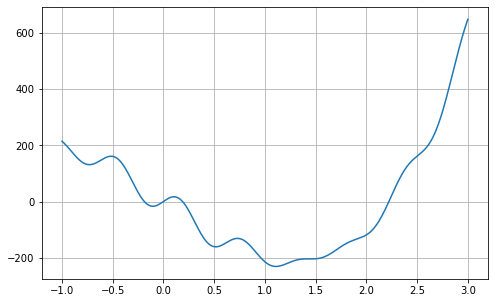

In [109]:
t = np.linspace(interval[0],interval[1],500)
fu=f(t)
fig1 = plt.figure(figsize=(8,5))
plt.plot(t,fu)
plt.grid(True)